In [1]:
import tensorflow as tf
from tensorflow import keras
#########
fas_data=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fas_data.load_data()

In [2]:
# explore data
import numpy as np
print(train_images.shape)
print(test_images.shape)
print(train_labels[0:20])
print('Training Classes',len(np.unique(train_labels)))
print('Testing Classes',len(np.unique(test_labels)))

(60000, 28, 28)
(10000, 28, 28)
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]
Training Classes 10
Testing Classes 10


In [3]:
i=10000
print(train_images[i].shape)
print('Max pixel value',np.max(train_images[i]))
print('Min pixel value',np.min(train_images[i]))
print('NUmber of colors', len(np.unique(train_images[i])))
print(train_images[i])

(28, 28)
Max pixel value 255
Min pixel value 0
NUmber of colors 194
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  55  89 161 117  74  92  60   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   9  19   0   0]
 [  0  77 143 239 231 175 117 139 157 218 212 173 120 174 206 146 163 154
  170 150 127 158 201 224 198 132 113   0]
 [  0 142 147  79   0  84 223 135   0   0  33 144  89 202  51   0   0   0
  142 179 205 115  94  62  28 141 113  

Text(0.5, 0, 'Ankle boot')

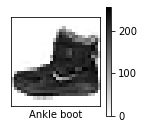

In [4]:
i=0
img=train_images[i]
label=train_labels[i]
class_names=['Tshit/TOP','Trouser','Pullover','Dress','Coat',
             'Sandel','Shirt','Sneaker','Bag','Ankle boot']
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(img,cmap=plt.cm.binary)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.xlabel(class_names[label])

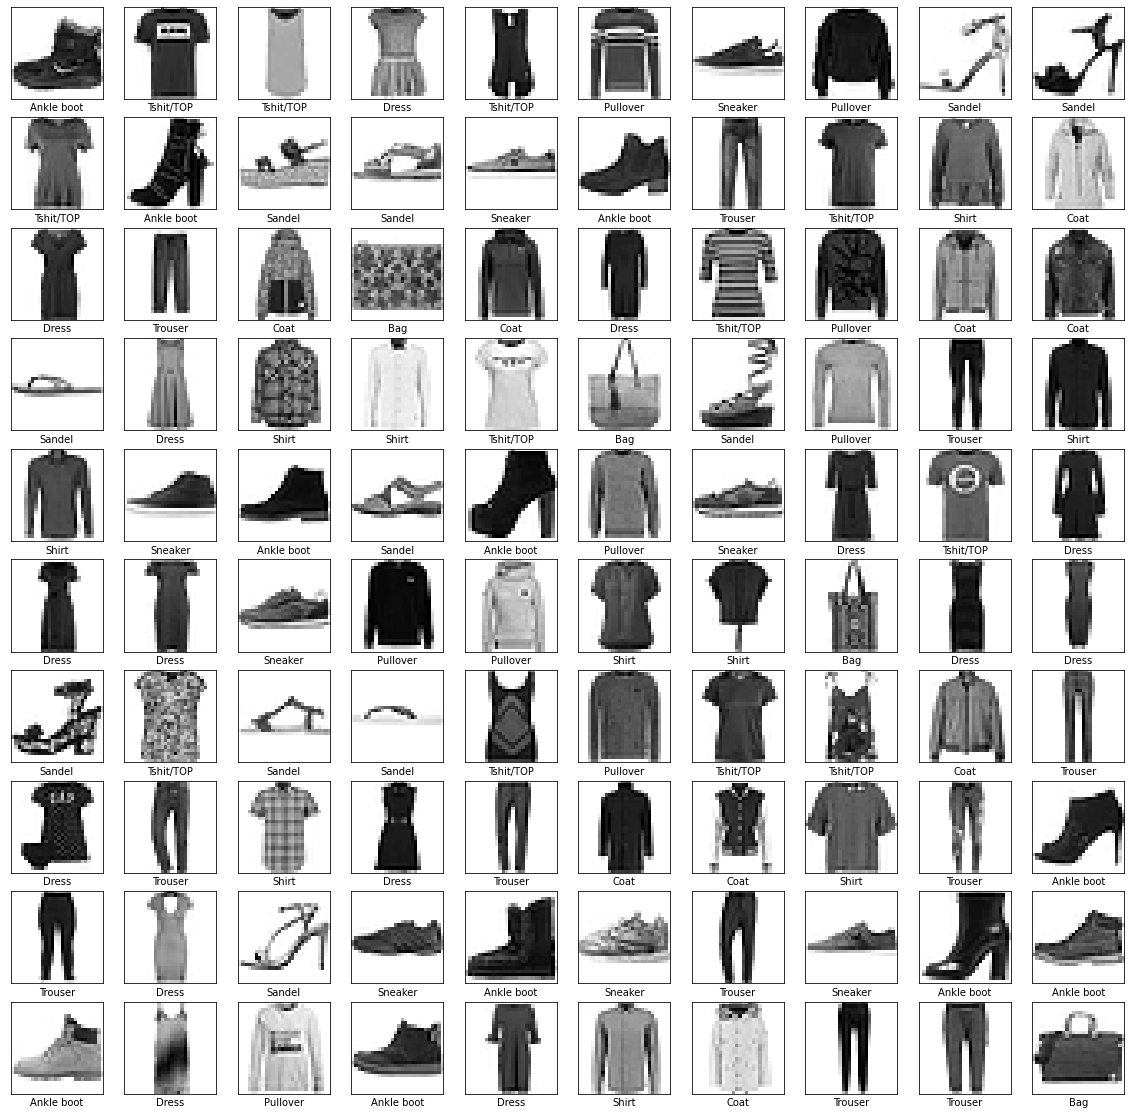

In [5]:
# plot 100 image
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [6]:
# Data preprocessing
# input [0-255] require scaling in [0-1]
train_images=train_images/255.0
test_images=test_images/255.0
# target
train_l=keras.utils.to_categorical(train_labels,10) # 10 class
test_l=keras.utils.to_categorical(test_labels,10)

In [7]:
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) #28 x 28=784 x 1
model.add(keras.layers.Dense(128,activation='linear'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images,train_l,epochs=10,verbose=1,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 85us/sample - loss: 0.5510 - accuracy: 0.8098 - val_loss: 0.5310 - val_accuracy: 0.8221
Epoch 2/10
48000/48000 [==============================] - 4s 77us/sample - loss: 0.4598 - accuracy: 0.8404 - val_loss: 0.4475 - val_accuracy: 0.8417
Epoch 3/10
48000/48000 [==============================] - 4s 74us/sample - loss: 0.4412 - accuracy: 0.8452 - val_loss: 0.4569 - val_accuracy: 0.8413
Epoch 4/10
48000/48000 [==============================] - 3s 73us/sample - loss: 0.4331 - accuracy: 0.8484 - val_loss: 0.4617 - val_accuracy: 0.8345
Epoch 5/10
48000/48000 [==============================] - 3s 71us/sample - loss: 0.4303 - accuracy: 0.8494 - val_loss: 0.4455 - val_accuracy: 0.8447
Epoch 6/10
48000/48000 [==============================] - 3s 71us/sample - loss: 0.4186 - accuracy: 0.8539 - val_loss: 0.4456 - val_accuracy: 0.8421
Epoch 7/10
48000/48000 [==============================] 

In [9]:
test_loss,test_acc=model.evaluate(test_images,test_l)
print(test_acc)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.4743 - accuracy: 0.8355
0.8355


[2.8347005e-09 8.5927123e-09 2.6300444e-08 1.4809437e-07 7.1352126e-08
 2.5778390e-03 3.7915139e-08 9.9485022e-01 2.3497267e-05 2.5481489e-03]
Predected class label:7, predected class:Sneaker
Target class label:7, Target class:Sneaker
Prediction probability :99.49%


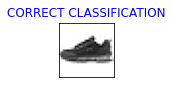

In [10]:
# prediction
pred=model.predict(test_images) # 10000x 28x 28
i=8000
print(pred[i])
img=test_images[i]
pred_label=np.argmax(pred[i])
true_label=test_labels[i]
print('Predected class label:{}, predected class:{}'.format(
    pred_label,class_names[pred_label]))
print('Target class label:{}, Target class:{}'.format(
    true_label,class_names[true_label]))
print('Prediction probability :{:.2f}%'.format(np.max(pred[i])*100))
#########################
plt.figure(figsize=(1,1))
plt.imshow(img,cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
if pred_label==true_label:
    color='blue'
    plt.title('CORRECT CLASSIFICATION',color=color)
else:
    color='red'
    plt.title('WRONG CLASSIFICATION',color=color)

In [11]:
# predict a single image
img=train_images[0]
print(img.shape)
img=np.expand_dims(img,0)
print(img.shape)
pred=model.predict(img) # 1 x 28 x 28
print(pred)
print('class: ',class_names[np.argmax(pred)])

(28, 28)
(1, 28, 28)
[[1.4172757e-12 1.9514331e-13 4.0492731e-12 4.5776057e-12 8.9976802e-12
  5.3855329e-05 2.9622094e-10 1.1856000e-04 1.9677329e-09 9.9982750e-01]]
class:  Ankle boot


(591, 394)


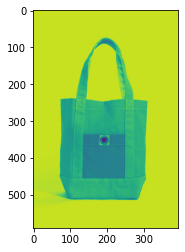

In [27]:
# coustom image
#1. read an image, 2. convert in grayscale, 3. reshape the image 28x28,
#preprocessing the image,5. expand dims, 6. predictg

import cv2
img1=cv2.imread('C:\\Users\\Manish\\Desktop\\INT 247\\INT 248\\Totebag.jpg',cv2.IMREAD_GRAYSCALE)
print(img1.shape)
#cv2.imshow('image',img)
#cv2.waitKey(0)
plt.imshow(img1)


In [28]:
img=cv2.resize(img1,(28,28))
print(img.shape)
img=img/255.0
img=1-img # complement
img=np.expand_dims(img,0)
print(img.shape)
#####################
pred=model.predict(img)
print(pred)
print('Predected_class :',class_names[np.argmax(pred)])
print('Prob :',np.max(pred))


(28, 28)
(1, 28, 28)
[[3.8530406e-02 2.1150575e-03 1.8807778e-02 1.5503086e-02 7.3796324e-03
  1.7813627e-04 3.2203615e-02 3.2574965e-06 8.8527900e-01 2.0810173e-08]]
Predected_class : Bag
Prob : 0.885279


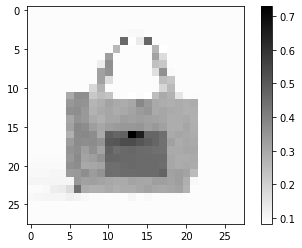

In [29]:
#print(img)
plt.imshow(img[0],cmap=plt.cm.binary)
plt.colorbar()

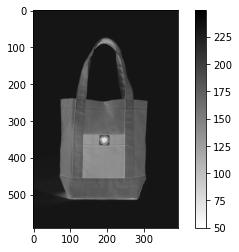

In [33]:
#print(train_images[0])
plt.imshow(img1,cmap=plt.cm.binary)
plt.colorbar()